In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as sc
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import *
with MPRester ("dbETTzBnFOmjGseN") as m:
    bands = m.get_bandstructure_by_material_id("mp-861937")

Largeur de la bande interdite = 0.5211000000000001 [eV]


<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

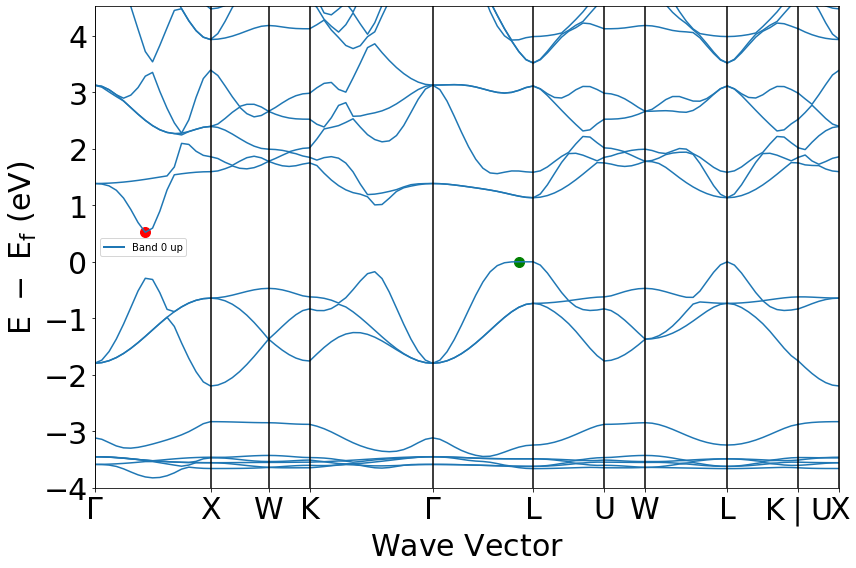

In [2]:
print("Largeur de la bande interdite =",bands.get_band_gap()['energy'],"[eV]")
plot = BSPlotter(bands) 
plot.get_plot(vbm_cbm_marker=True)

In [3]:
print('\n',bands.get_vbm()['band_index'])
print('\n',bands.get_cbm()['band_index'])
print("\nLa bande 17 est la bande de valence d'énergie maximale et la bande 18 est la bande de conduction d'énergie minimale")


 defaultdict(<class 'list'>, {<Spin.up: 1>: [17]})

 defaultdict(<class 'list'>, {<Spin.up: 1>: [18]})

La bande 17 est la bande de valence d'énergie maximale et la bande 18 est la bande de conduction d'énergie minimale


In [4]:
data = plot.bs_plot_data()

vbm = data.get('vbm')
cbm = data.get('cbm')

E = data['energy']
k = data['distances']

dEdk_valence = []
dEdk_conduction = []
for i in range(len(k)) :#nombre de frontières de chemin
    
    dk = k[i][0]-k[i][-1]
    dE_valence = E['1'][i][17][0]-E['1'][i][17][-1] #energy["1"][indice chemin][indice bande][indice dans la liste]
    dE_conduction = E['1'][i][18][0]-E['1'][i][18][-1]
    
    dEdk_conduction.append(abs(dE_conduction/dk))
    dEdk_valence.append(abs(dE_valence/dk))
 

print("Dispersion max conduction: de k =",k[dEdk_conduction.index(max(dEdk_conduction))][0],"1/A à",k[dEdk_conduction.index(max(dEdk_conduction))][-1],"1/A")
print("Dispersion min conduction: de k =",k[dEdk_conduction.index(min(dEdk_conduction))][0],"1/A à",k[dEdk_conduction.index(min(dEdk_conduction))][-1],"1/A")
print("Dispersion max valence est de k =",k[dEdk_valence.index(max(dEdk_valence))][0],"1/A vers k=",k[dEdk_valence.index(max(dEdk_valence))][-1],"1/A")
print("Dispersion min valence : de k =",k[dEdk_valence.index(min(dEdk_valence))][0],"1/A à",k[dEdk_valence.index(min(dEdk_valence))][-1],"1/A")


Dispersion max conduction: de k = 2.9443543837404667 1/A à 3.4213193274026015 1/A
Dispersion min conduction: de k = 3.4213193274026015 1/A à 3.69669516601995 1/A
Dispersion max valence est de k = 2.2698240916369583 1/A vers k= 2.9443543837404667 1/A
Dispersion min valence : de k = 4.72441178691678 1/A à 4.999787625534133 1/A


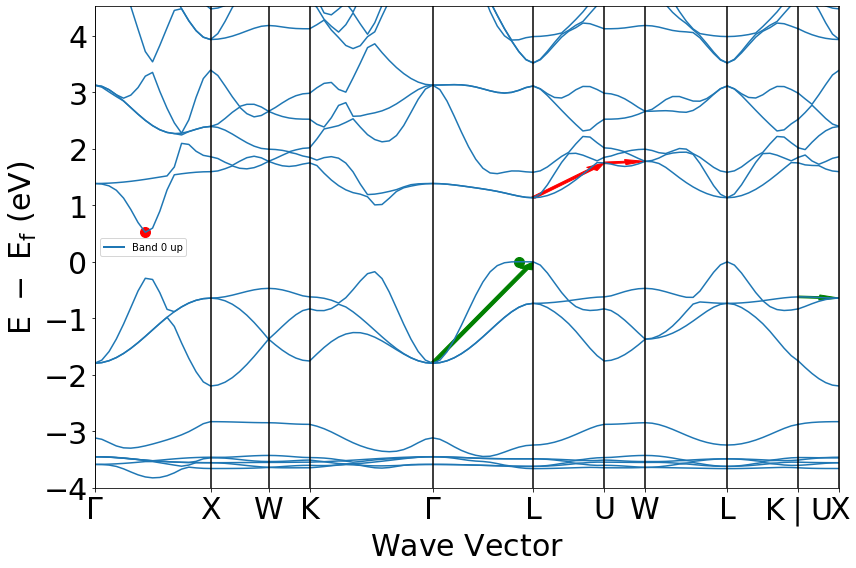

In [5]:
plot.get_plot(vbm_cbm_marker=True)
plt.arrow(k[dEdk_valence.index(min(dEdk_valence))][0],E['1'][dEdk_valence.index(min(dEdk_valence))][17][0],k[dEdk_valence.index(min(dEdk_valence))][-1]-k[dEdk_valence.index(min(dEdk_valence))][0],E['1'][dEdk_valence.index(min(dEdk_valence))][17][-1]-E['1'][dEdk_valence.index(min(dEdk_valence))][17][0],width = 0.03,length_includes_head=True,color='green') # plus petite pente de la bande de valence
plt.arrow(k[dEdk_valence.index(max(dEdk_valence))][0],E['1'][dEdk_valence.index(max(dEdk_valence))][17][0],k[dEdk_valence.index(max(dEdk_valence))][-1]-k[dEdk_valence.index(max(dEdk_valence))][0],E['1'][dEdk_valence.index(max(dEdk_valence))][17][-1]-E['1'][dEdk_valence.index(max(dEdk_valence))][17][0],width = 0.03,length_includes_head=True,color='green') # plus grande pente de la bande de valence
plt.arrow(k[dEdk_conduction.index(min(dEdk_conduction))][0],E['1'][dEdk_conduction.index(min(dEdk_conduction))][18][0],k[dEdk_conduction.index(min(dEdk_conduction))][-1]-k[dEdk_conduction.index(min(dEdk_conduction))][0],E['1'][dEdk_conduction.index(min(dEdk_conduction))][18][-1]-E['1'][dEdk_conduction.index(min(dEdk_conduction))][18][0],width = 0.03,length_includes_head=True,color='red') # plus petite pente de la bande de conduction
plt.arrow(k[dEdk_conduction.index(max(dEdk_conduction))][0],E['1'][dEdk_conduction.index(max(dEdk_conduction))][18][0],k[dEdk_conduction.index(max(dEdk_conduction))][-1]-k[dEdk_conduction.index(max(dEdk_conduction))][0],E['1'][dEdk_conduction.index(max(dEdk_conduction))][18][-1]-E['1'][dEdk_conduction.index(max(dEdk_conduction))][18][0],width = 0.03,length_includes_head=True,color='red') # plus grande pente de la bande de conduction
plt.show()

Les différentes flèches représentent les dispersions maximales (fortes pentes) et minimales (faibles pentes), les flèches vertes pour la bande de valence et les rouges pour la bande de conduction.

Pour calculer la masse effective, on utilise la relation suivante: $\newline$
\begin{equation}
\frac{1}{m^{*}} = \frac{1}{\hbar^{2}} \frac{\partial^{2}E}{\partial k^{2}}
\end{equation}
$\newline$
En supposant une dispersion parabolique, on obtient assez aisément les dérivées secondes souhaitées en effectuant une interpolation polynomiale d'ordre 2.

Approximation quadratique conduction :  y(k) = 8.334605454572639k² -6.1751633768499525k + 1.6575562500000007
Approximation quadratique valence :  y(k) = -4.055062984786876k² + 23.27635303903899k -33.40001459269771
Masse effective conduction :  4.164155001826318e-31kg
Masse effective valence :  -8.558828585921867e-31kg


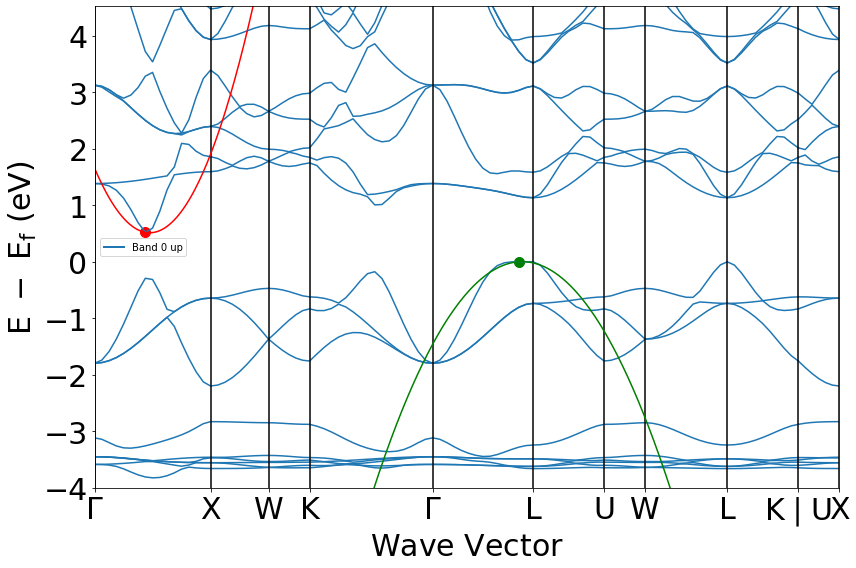

In [6]:
k_val = np.zeros(3)
e_val = np.zeros(3)
k_cond = np.zeros(3)
e_cond = np.zeros(3) 

k_val[0] = k[4][-2]
k_val[1] = vbm[0][0]
k_val[2] = k[5][1]

e_val[0] = E['1'][4][17][-2]
e_val[1] = vbm[0][1]
e_val[2] = E['1'][5][17][1]

k_cond[0] = k[0][-2]
k_cond[1] = cbm[0][0]
k_cond[2] = k[0][1]

e_cond[0] = E['1'][0][18][-2]
e_cond[1] = cbm[0][1]
e_cond[2] = E['1'][0][18][1]

plot.get_plot(vbm_cbm_marker = True)

f_val = np.polyfit(k_val, e_val, 2) 
x_val = np.linspace(k[0][0],k[9][-1],1000)
plt.plot(x_val,np.polyval(f_val,x_val),'g')

f_cond = np.polyfit(k_cond, e_cond, 2)
x_cond = np.linspace(k[0][0],k[9][-1],1000)
plt.plot(x_cond,np.polyval(f_cond,x_cond),'r')

print("Approximation quadratique valence : ","y(k) = "+str(f_val[0])+"k² + "+str(f_val[1])+"k "+str(f_val[2]))
print("Approximation quadratique conduction : ","y(k) = "+str(f_cond[0])+"k² "+str(f_cond[1])+"k + "+str(f_cond[2]))

d2cond = 2*f_cond[0]
d2val = 2*f_val[0]

print("Masse effective valence : ",str(sc.hbar**2/(d2val*sc.e*10**-20)) + "kg")
print("Masse effective conduction : ",str(sc.hbar**2/(d2cond*sc.e*10**-20)) + "kg")